Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10
Библиотеки: [Python, Tensorflow]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

## Загрузка и подготовка датасета CIFAR-10

In [23]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [24]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


## Визуализация датасета CIFAR-10

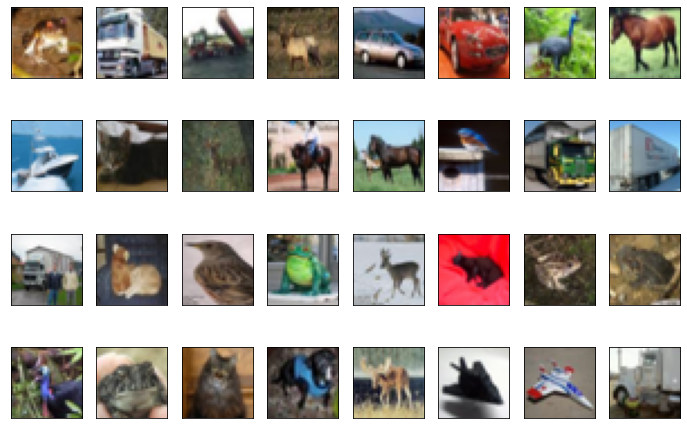

In [8]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(12, 8))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,:])
    plt.xticks([]), plt.yticks([])
plt.show()

## Создание модели CNN

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
NUM_EPOCHS = 20

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7098 - accuracy: 0.3726
Epoch 2/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0598 - accuracy: 0.6255
Epoch 3/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8425 - accuracy: 0.7027
Epoch 4/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6816 - accuracy: 0.7580
Epoch 5/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5465 - accuracy: 0.8065
Epoch 6/20
1563/1563 [==============================] - 46s 30ms/step - loss: 0.4264 - accuracy: 0.8508
Epoch 7/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.3168 - accuracy: 0.8891
Epoch 8/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2427 - accuracy: 0.9164
Epoch 9/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.1934 - accuracy: 0.9333
Epoch 10/20
1563/1563 [==============================] - 47s 30m

In [34]:
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(10000, 32, 32, 3) float32
(10000, 1) uint8


In [35]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 6ms/step - loss: 2.4391 - accuracy: 0.6780


[2.4391186237335205, 0.6779999732971191]

In [48]:
model.save('model_cifar10')

INFO:tensorflow:Assets written to: model_cifar10\assets


In [36]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[7.8177294e-07 4.3897697e-04 3.3355341e-06 9.3819028e-01 9.5628377e-05
 6.0747031e-02 3.9294161e-04 4.5305150e-08 1.2841480e-04 2.6761618e-06], shape=(10,), dtype=float32)


In [37]:
def test_cifar10(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,:])
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted: {}'.format(ans))

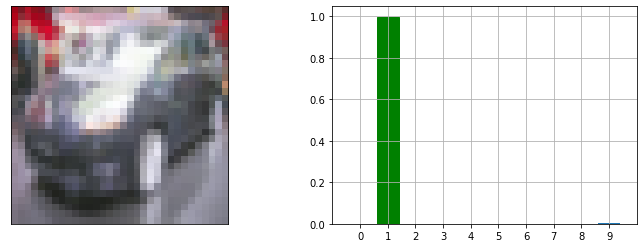

Predicted: 1
True Answer: [1]


In [51]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_cifar10(sample)

print('True Answer: {}'.format(test_y[idx]))

In [30]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']